The dataset contains observations of US domestic flights in 2013, and consists of the following fields:  
  
<b>Year:</b> The year of the flight (all records are from 2013)  
<b>Month:</b> The month of the flight  
<b>DayofMonth:</b> The day of the month on which the flight departed  
<b>DayOfWeek:</b> The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)  
<b>Carrier:</b> The two-letter abbreviation for the airline.  
<b>OriginAirportID:</b> A unique numeric identifier for the departure aiport  
<b>OriginAirportName:</b> The full name of the departure airport  
<b>OriginCity:</b> The departure airport city  
<b>OriginState:</b> The departure airport state  
<b>DestAirportID:</b> A unique numeric identifier for the destination aiport  
<b>DestAirportName:</b> The full name of the destination airport  
<b>DestCity:</b> The destination airport city  
<b>DestState:</b> The destination airport state  
<b>CRSDepTime:</b> The scheduled departure time  
<b>DepDelay:</b> The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)  
<b>DelDelay15:</b> A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")  
<b>CRSArrTime:</b> The scheduled arrival time  
<b>ArrDelay:</b> The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)  
<b>ArrDelay15:</b> A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")  
<b>Cancelled:</b> A binary indicator that the flight was cancelled   
  
Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a 
flight.  
  
1. Start by cleaning the data.  
* Identify any null or missing data, and impute appropriate replacement values.  
* Identify and eliminate any outliers in the <b>DepDelay</b> and <b>ArrDelay</b> columns.  
2. Explore the cleaned data.  
* View summary statistics for the numeric fields in the dataset.  
* Determine the distribution of the <b>DepDelay</b> and <b>ArrDelay</b> columns.  
* Use statistics, aggregate functions, and visualizations to answer the following questions:  
** What are the average (mean) departure and arrival delays?  
** How do the carriers compare in terms of arrival delay performance?  
** Are some days of the week more prone to arrival days than others?  
** Which departure airport has the highest average departure delay?  
** Do <b><i>late</i></b> departures tend to result in longer arrival delays than on-time departures?  
** Which route (from origin airport to destination airport) has the most <b><i>late</b></i> arrivals?  
** Which route has the highest average arrival delay?  
  
Add markdown and code cells as requried to create your solution.  
  
Note: There is no single "correct" solution. A sample solution is provided in 01 - Flights Challenge.ipynb.

In [58]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv',delimiter=',',header=0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [60]:
df.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

as the DepDel15 can be calculated from the the DepDelay column lets see how the distribution is for these missing values

In [61]:
df[df.DepDel15.isna()]['DepDelay'].describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

from its summary we can see that all the missing values in ArrDel15 were actually 0 mins late, lets fill these missing values based on not null values

In [62]:
print(df.DepDel15.value_counts())
df['DepDel15'] = df['DepDel15'].fillna(0)
df.isna().sum().sum()

0.0    215038
1.0     54141
Name: DepDel15, dtype: int64


0

the dataset is clean of missing values

DepDelay
Min: -63.00
Mean: 10.35
Median: -1.00
Mode: -3.00
Max: 1425.00



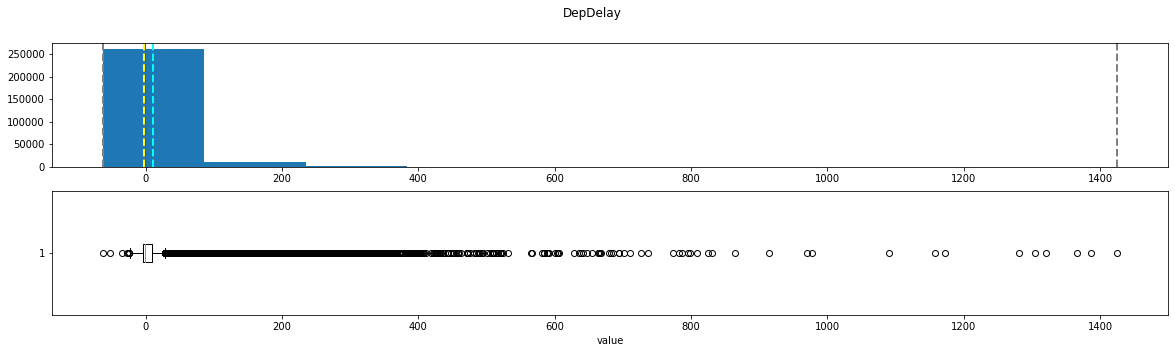

ArrDelay
Min: -75.00
Mean: 6.50
Median: -3.00
Mode: 0.00
Max: 1440.00



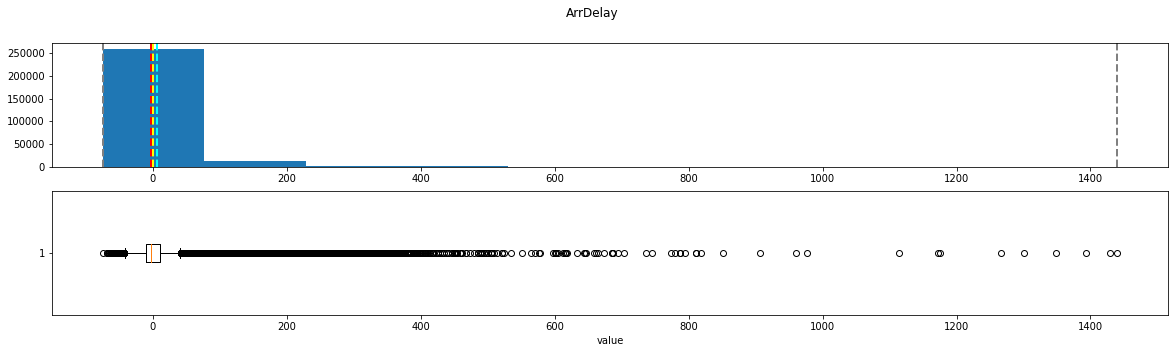

In [64]:
import matplotlib.pyplot as plt
def show_distribution(col_name):
    fig,ax = plt.subplots(2,1,figsize=(20,5))
    col = df[col_name]
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    median_val = col.median()
    mode_val = col.mode()[0]
    print('{}\nMin: {:0.2f}\nMean: {:0.2f}\nMedian: {:0.2f}\nMode: {:0.2f}\nMax: {:0.2f}\n'.format(col_name,min_val,mean_val,median_val,mode_val,max_val))

    ax[0].hist(x=col)
    ax[0].axvline(min_val,color='gray',linewidth=2,linestyle='--')
    ax[0].axvline(mean_val,color='cyan',linewidth=2,linestyle='--')
    ax[0].axvline(median_val,color='red',linewidth=2,linestyle='--')
    ax[0].axvline(mode_val,color='yellow',linewidth=2,linestyle='--')
    ax[0].axvline(max_val,color='gray',linewidth=2,linestyle='--')
    
    ax[1].boxplot(col,vert=False)
    ax[1].set_xlabel('value')
    
    fig.suptitle(col_name)
    plt.show()
for col_name in ['DepDelay','ArrDelay']:
    show_distribution(col_name)

DepDelay
Min: -11.00
Mean: -0.13
Median: -2.00
Mode: -3.00
Max: 36.00



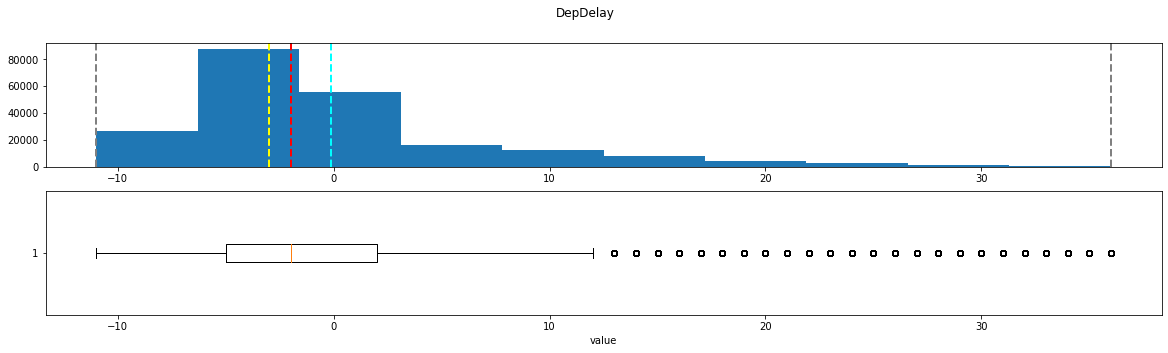

ArrDelay
Min: -32.00
Mean: -5.68
Median: -6.00
Mode: 0.00
Max: 16.00



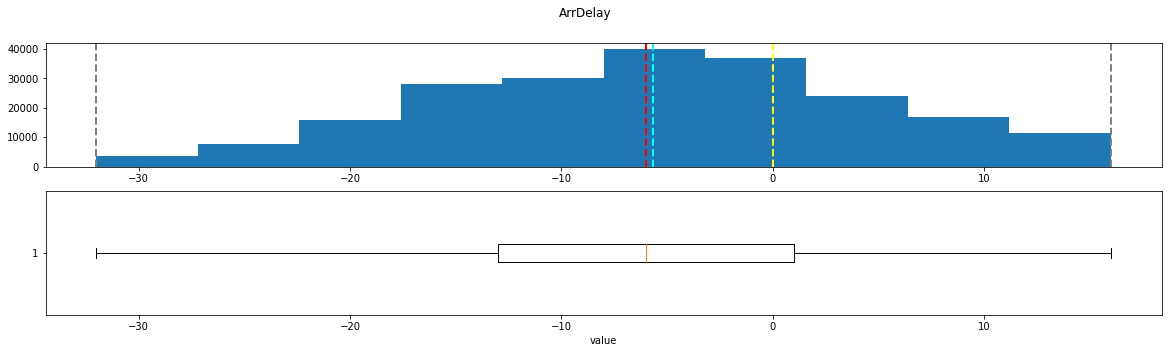

In [65]:
import scipy.stats as stats
delay_cols = ['DepDelay','ArrDelay']
for col_name in delay_cols:
    q01,q90 = df[col_name].quantile(0.01),df[col_name].quantile(0.90)
    # df = df[df[col_name]>q01 & df[col_name]<q90].copy()
    df = df.query('{}>{} and {}<{}'.format(col_name,q01,col_name,q90))

for col_name in delay_cols:
    show_distribution(col_name)

In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,214500.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
Month,214500.0,7.027296,2.006267,4.0,5.0,7.0,9.0,10.0
DayofMonth,214500.0,15.799389,8.853235,1.0,8.0,16.0,23.0,31.0
DayOfWeek,214500.0,3.904168,1.998344,1.0,2.0,4.0,6.0,7.0
OriginAirportID,214500.0,12755.329371,1512.139480,10140.0,11292.0,12892.0,14100.0,15376.0
DestAirportID,214500.0,12734.206438,1506.103555,10140.0,11292.0,12892.0,14057.0,15376.0
CRSDepTime,214500.0,1284.230942,470.230018,1.0,853.0,1240.0,1658.0,2359.0
DepDelay,214500.0,-0.130452,7.260672,-11.0,-5.0,-2.0,2.0,36.0
DepDel15,214500.0,0.057604,0.232993,0.0,0.0,0.0,0.0,1.0
CRSArrTime,214500.0,1465.878522,487.646410,1.0,1055.0,1448.0,1850.0,2359.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214500 entries, 0 to 271938
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               214500 non-null  int64  
 1   Month              214500 non-null  int64  
 2   DayofMonth         214500 non-null  int64  
 3   DayOfWeek          214500 non-null  int64  
 4   Carrier            214500 non-null  object 
 5   OriginAirportID    214500 non-null  int64  
 6   OriginAirportName  214500 non-null  object 
 7   OriginCity         214500 non-null  object 
 8   OriginState        214500 non-null  object 
 9   DestAirportID      214500 non-null  int64  
 10  DestAirportName    214500 non-null  object 
 11  DestCity           214500 non-null  object 
 12  DestState          214500 non-null  object 
 13  CRSDepTime         214500 non-null  int64  
 14  DepDelay           214500 non-null  int64  
 15  DepDel15           214500 non-null  float64
 16  CR

### What are the average (mean) departure and arrival delays?

In [ ]:
df.DepDelay.mean(),df.ArrDelay.mean()

(-0.13045221445221444, -5.680522144522144)

### How do the carriers compare in terms of arrival delay performance?

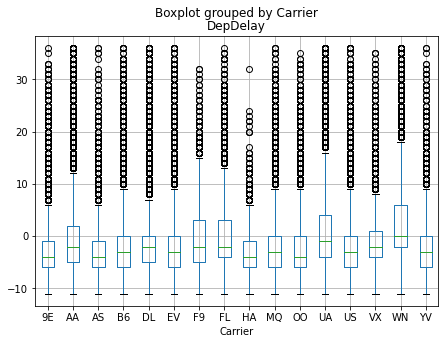

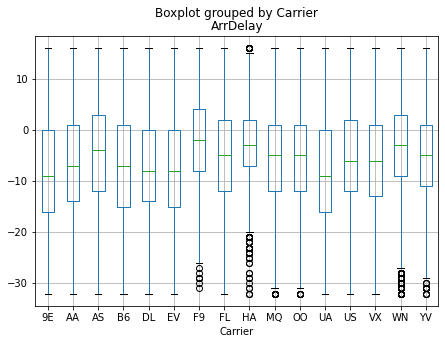

In [86]:
for col_name in delay_cols:
    df.boxplot(by='Carrier',column=col_name,figsize=(7,5))
plt.show()

### Are some days of the week more prone to arrival days than others?

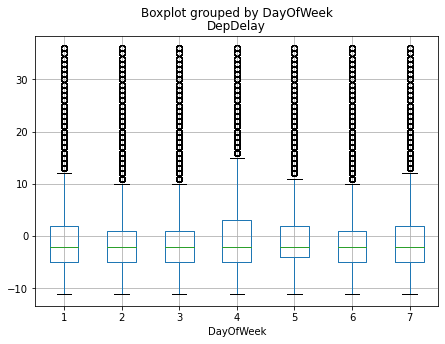

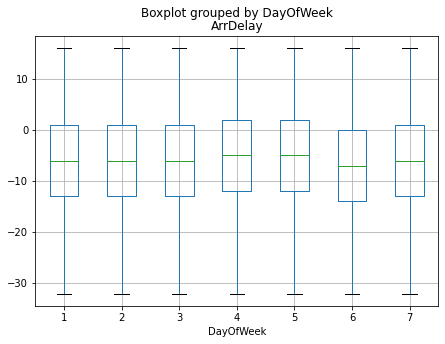

In [87]:
for col_name in delay_cols:
    df.boxplot(by='DayOfWeek',column=col_name,figsize=(7,5))
plt.show()

### Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Chicago Midway International,3.865294
Dallas Love Field,3.039141
William P Hobby,2.706247
Denver International,1.863804
Baltimore/Washington International Thurgood Marshall,1.805401


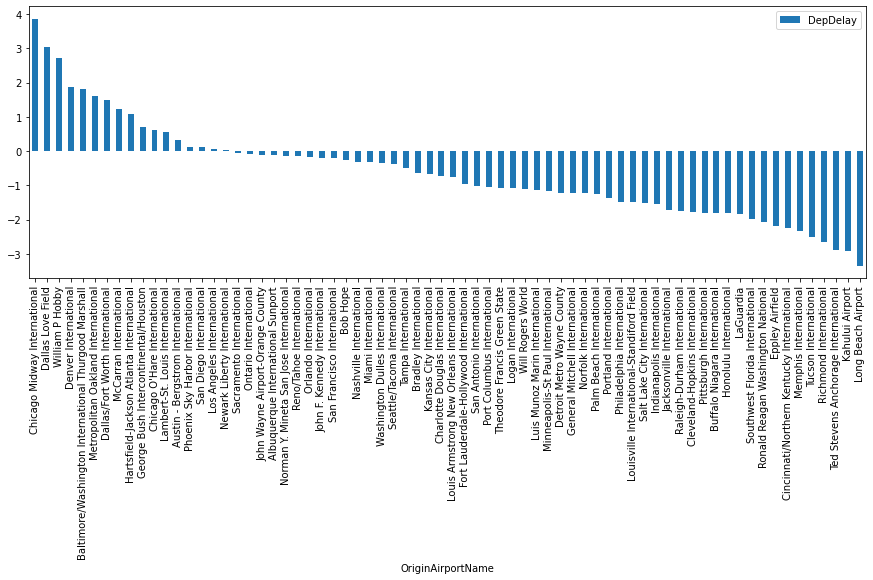

In [115]:
Arprt_delay = df.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)
Arprt_delay = pd.DataFrame(Arprt_delay)
Arprt_delay.plot.bar(figsize=(15,5))
Arprt_delay.head()


### Do late departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

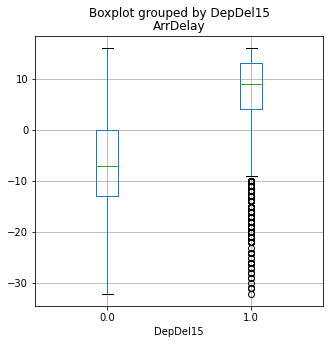

In [129]:
df.boxplot(column='ArrDelay',by='DepDel15',figsize=(5,5))

### Which route (from origin airport to destination airport) has the most late arrivals?

In [138]:
rout_delay = df.groupby(['OriginAirportName','DestAirportName'])['ArrDel15'].sum().reset_index()
rout_delay['rout'] = rout_delay['OriginAirportName']+' -> '+rout_delay['DestAirportName']
rout_delay[['rout','ArrDel15']].sort_values(by='ArrDel15',ascending=False).set_index('rout').head()

,ArrDel15
rout,
San Francisco International -> Los Angeles International,67
Los Angeles International -> San Francisco International,42
Detroit Metro Wayne County -> Chicago O'Hare International,29
LaGuardia -> Logan International,29
LaGuardia -> Chicago O'Hare International,27


### Which route has the highest average arrival delay?

In [140]:
rout_delay = df.groupby(['OriginAirportName','DestAirportName'])['ArrDelay'].mean().reset_index()
rout_delay['rout'] = rout_delay['OriginAirportName']+' -> '+rout_delay['DestAirportName']
rout_delay[['rout','ArrDelay']].sort_values(by='ArrDelay',ascending=False).set_index('rout').head()

,ArrDelay
rout,
Theodore Francis Green State -> Southwest Florida International,12.0
Charlotte Douglas International -> General Mitchell International,10.0
Indianapolis International -> Philadelphia International,10.0
Port Columbus International -> Logan International,7.0
Cleveland-Hopkins International -> Philadelphia International,7.0
